<a href="https://colab.research.google.com/github/acv0209/DKUBigData/blob/master/bigdata_colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Numpy를 이용하여 Multi-Layer Perceptron 구현하기**


---




In [1]:
# -*- coding: utf-8 -*-
import numpy as np
epochs = 3000  
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
# 인공적으로 랜덤 입력과 출력 만들기 x : 입력 y : 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
# sigmoid와 그 미분을 함수로 선언
def sigmoid(x): return 1 / (1 + np.exp(-x)) 
def sigmoid_derivative(x): return x * (1 - x)  



Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))
for i in range(epochs):
    H = sigmoid(np.dot(X, Wh)) # layer 1
    Z = sigmoid(np.dot(H, Wz)) # layer 2  
    E = np.square(Y - Z).sum() # error
   
    # back propagation
    # w 갱신 = 기존 W - 출발노드의 output * 도착 노드의 delta
    
    dZ = (Y - Z) * sigmoid_derivative(Z)   # delta layer 2(output layer) : E에 대한 layer output 미분(Y-Z) * 활성화 함수 미분
    dH = dZ.dot(Wz.T) * sigmoid_derivative(H)   # delta layer 1 : E에 대한 layer output 미분(delta layer 2*weight) * 활성화 함수 미분
    
    
    Wz += H.T.dot(dZ) #Wz = Wz + H.T.dot(dz)
    Wh += X.T.dot(dH)  

print(Z)


[[0.06148866]
 [0.96174742]
 [0.96174391]
 [0.01641385]]


# 2. Keras를 이용하여 같은 Multi-Layer Perceptron 구현하기


---

코드가 매우 단순해지는 것을 볼 수 있습니다.

In [2]:
# -*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import numpy as np
sgd = SGD(lr=0.1)

epochs = 5000
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
# 인공적으로 랜덤 입력과 출력 만들기 x : 입력 y : 출력
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])



model = Sequential()
model.add(Dense(hiddenLayerSize, input_dim=inputLayerSize, activation='sigmoid'))
model.add(Dense(outputLayerSize, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) 

model.fit(x, y, batch_size=4, epochs=epochs)

print(model.predict_proba(x))

Using TensorFlow backend.


Epoch 1/5000
4/4 [==============================] - 2s 517ms/step - loss: 0.6961 - acc: 0.5000
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6960 - acc: 0.5000
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959 - acc: 0.5000
Epoch 4/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959 - acc: 0.5000
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958 - acc: 0.5000
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957 - acc: 0.5000
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957 - acc: 0.5000
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6956 - acc: 0.5000
Epoch 9/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6956 - acc: 0.5000
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6955 - acc: 0.5000
Epoch 11/5000
4/4 [==============================] - 0s 996us/step 

# 3. Keras를 이용하여 MNIST Classifier 구현하기

---
## MNIST 로딩하기

MNIST같은 유명한 dataset은 따로 다운받지 않아도 Keras나 Tensorflow, Pytorch 등의 라이브러리에서 기본적으로 제공해주는 경우가 많습니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

nb_classes = 10 # class의 개수

(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# MNIST data 로딩. x: 이미지데이터  y: 이미지의 class
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


## 로딩된 데이터 확인해보기

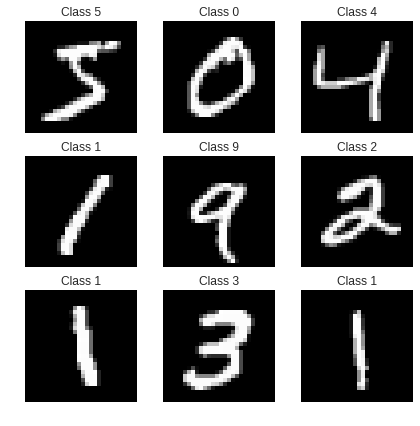

In [4]:
# 시각화할 figure의 크기를 키운다(28*28이 실제 눈으로 보기에 좀 작기 때문)
plt.rcParams['figure.figsize'] = (7,7)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))

## 데이터 전처리

In [5]:
# 벡터화. CNN을 사용하지 않을 것이기 때문에 28*28 이미지른 784차원 벡터로 vectorize한다.
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# 정규화. 데이터의 범위를 0~255에서 0~1로 바꾼다.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# classification을 하기 위해 label을 categrical 형태로 변환.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


##모델 설계

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

## 학습

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 60us/step - loss: 0.2479 - val_loss: 0.1031
Epoch 2/4
60000/60000 [==============================] - 3s 54us/step - loss: 0.1026 - val_loss: 0.0781
Epoch 3/4
60000/60000 [==============================] - 3s 54us/step - loss: 0.0724 - val_loss: 0.0753
Epoch 4/4
60000/60000 [==============================] - 3s 54us/step - loss: 0.0558 - val_loss: 0.0610


## 학습 평가

Test loss: 0.06095771871721372


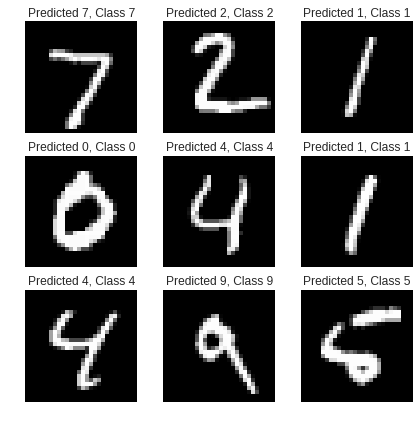

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)


predicted_classes = model.predict_classes(X_test)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], y_test[i]))

# 4. Keras를 이용하여 MNIST AutoEncoder 구현하기

---


In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

#Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.2201 - val_loss: 0.1723
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1609 - val_loss: 0.1590
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1443 - val_loss: 0.1358
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1356 - val_loss: 0.1291
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1302 - val_loss: 0.1278
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1265 - val_loss: 0.1245
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1236 - val_loss: 0.1209
Epoch 8/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1214 - val_loss: 0.1189
Epoch 9/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1196 - val_loss: 0.

## **결과 visualization**

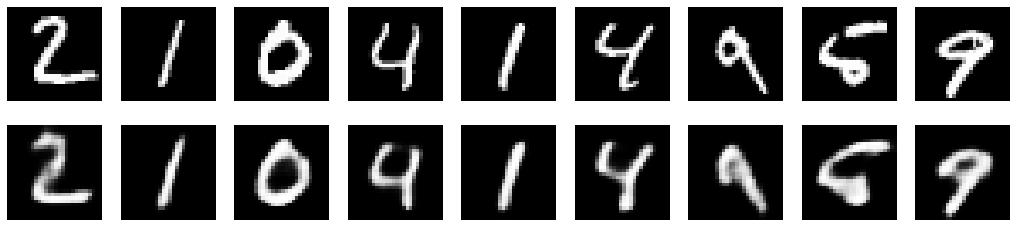

In [11]:
# visualize trained autoencoder
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()